# Modelo de una linea de espera con un servidor

**Ejemplo**

El tiempo que transcurre entre la llegada de ciertas piezas a una estación de inspección sigue una distribución exponencial con media de 5 minutos/pieza. El proceso está a cargo de un operario, y la duración de la inspección sigue una distribución normal con media de 4.0 y desviación estándar de 0.5 minutos/pieza. Calcule el tiempo promedio de permanencia de las piezas en el proceso de inspección.

In [12]:
from random import expovariate as expo
from random import normalvariate as N
import numpy as np
import pandas as pd

def lineaT(E):
  ta = 0
  t3 = 0
  ts = 0
  l0 = []
  l1 = []
  l2 = []
  l3 = []
  l4 = []
  l5 = []
  l6 = []
  l7 = []
  l8 = []
  for i in range(E):
    l0.append(i+1) # No. pieza

    t1 = expo(1/5)
    l1.append(t1) # tiempo entre llegadas

    ta += t1 # tiempo de llegada
    l2.append(ta)

    t2 = N(4,0.5) # tiempo de inspeccion
    l4.append(t2)

    if i == 0:
      t3 = ta
      l3.append(t3) # inicio de la inspeccion
    else:
      t3 = max(ta,l5[i-1]) # inicio de la inspeccion
      l3.append(t3)

    if i==0:
      td = ta + t2
      l5.append(td) # fin de la inspeccion
    else:
      td = t3 + t2
      l5.append(td) # fin de la inspeccion

    l6.append(td - ta) # tiempo en el sistema

    l7.append(np.abs(t3-ta)) # tiempo de espera

    l8.append(np.mean(l6)) # tiempo promedio en el sistema

  return pd.DataFrame(np.round([l0,l1,l2,l3,l4,l5,l6,l7,l8],2).T ,
                     columns = ["No. de pieza",
                                "tiempo entre llegadas",
                                'tiempo de llegada',
                                "inicio de la inspeccion",
                                "tiempo de inspeccion",
                                'fin de la inspeccion',
                                "tiempo en el sistema",
                                "tiempo de espera",
                                "Tiempo promedio en el sistema"])

w = lineaT(30)
w

,No. de pieza,tiempo entre llegadas,tiempo de llegada,inicio de la inspeccion,tiempo de inspeccion,fin de la inspeccion,tiempo en el sistema,tiempo de espera,Tiempo promedio en el sistema
0,1.0,0.54,0.54,0.54,3.78,4.32,3.78,0.00,3.78
1,2.0,0.36,0.90,4.32,4.41,8.73,7.83,3.42,5.81
2,3.0,2.44,3.34,8.73,4.21,12.94,9.60,5.39,7.07
3,4.0,4.64,7.98,12.94,4.59,17.53,9.55,4.95,7.69
4,5.0,6.87,14.85,17.53,4.62,22.15,7.30,2.68,7.61
5,6.0,5.29,20.14,22.15,4.55,26.70,6.56,2.01,7.44
6,7.0,5.35,25.49,26.70,4.03,30.72,5.24,1.21,7.12
7,8.0,0.52,26.00,30.72,3.88,34.61,8.61,4.72,7.31
8,9.0,13.57,39.57,39.57,3.54,43.11,3.54,0.00,6.89
9,10.0,9.31,48.89,48.89,3.88,52.77,3.88,0.00,6.59


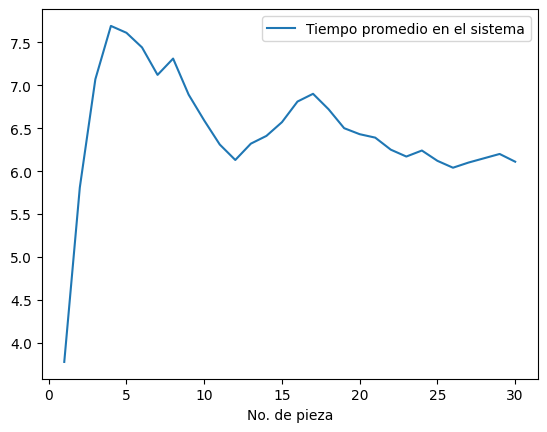

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, ax = plt.subplots()
w.plot(kind="line",x="No. de pieza",y = "Tiempo promedio en el sistema",ax=ax)
plt.show()